This script takes a folder that contains only images that have passed our manual QC process. This script then subsets the images to make a balanced
dataset, based on the smallest number of images across all PSA categories. Those images are then copied to a separate folder. Additionally some bar graphs
of the data balancing process are made. Note that the code to do the file copying is commented out and should only be run once.

In [1]:
import pandas as pd
import os

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
##  USER INPUT  ##

# folder where the images are
folder_path = "/Users/brianmiller/Desktop/trading_card_data/verified_data/cropped_QCpass_data_3"

# folder where the balanced dataset images should be copied to
destination_directory = "/Users/brianmiller/Desktop/trading_card_data/verified_data/data_for_model_3"


In [3]:
##  GET SIZE METADATA ABOUT THE IMAGES  ##

# Initialize an empty list to store the metadata
metadata_list = []

# Iterate through all files in the directory
for file in os.listdir(folder_path):
    # Check if the file is a .jpg
    if file.endswith(".jpg"):
        # Extract the grade
        grade = int(file.split("PSA")[1].split("_")[0])

        # Build the original file name
        original_file_name = file.split("_cropped")[0] + ".jpg"

        # Get the file path
        file_path = os.path.join(folder_path, file)

        # Append the metadata as a tuple to the list
        metadata_list.append((file, file_path, grade, original_file_name))

# Convert the list of tuples to a DataFrame
metadata_df = pd.DataFrame(metadata_list, columns=["file_name", "file_path", "grade", "original_file_name"])

print(metadata_df.info())

# check for if any images are in the dataset twice
duplicates_count = metadata_df['file_name'].duplicated().sum()

print("\nNumber of duplicate images:", duplicates_count)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13050 entries, 0 to 13049
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   file_name           13050 non-null  object
 1   file_path           13050 non-null  object
 2   grade               13050 non-null  int64 
 3   original_file_name  13050 non-null  object
dtypes: int64(1), object(3)
memory usage: 407.9+ KB
None

Number of duplicate images: 0


grade
7        1483
5        1440
2        1385
9        1385
3        1365
6        1304
4        1301
8        1222
10       1089
1        1076
dtype: int64


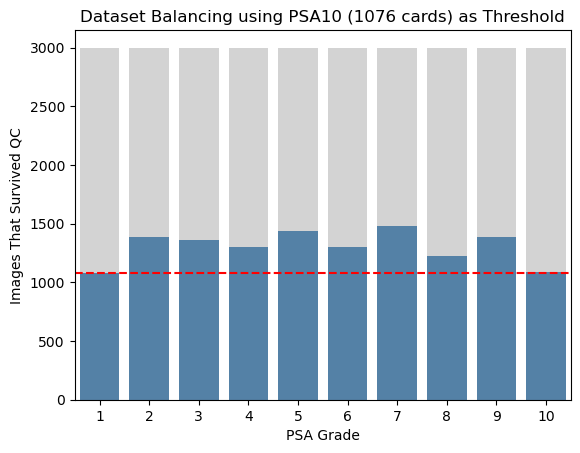

In [4]:
##  VISUALIZE DATASET BALANCING  ##

# find the number of cards that the was the least, by grade
# this will be used as the new number of cards for every grade
min_card_freq = metadata_df[["grade"]].value_counts().min()

# display the number of cards per grade
print(metadata_df[["grade"]].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the background bar
background_data = pd.DataFrame({'grade': metadata_df['grade'], 'count': 3000})

# Plot the background bar
sns.barplot(x='grade', y='count', data=background_data, color='lightgray')

# Plot the count of images that survived QC
sns.countplot(x='grade', data=metadata_df, color='steelblue', order=sorted(metadata_df['grade'].unique(), reverse=False))

# Set the plot title and axis labels
plt.title('Dataset Balancing using PSA10 ({} cards) as Threshold'.format(min_card_freq))
plt.xlabel('PSA Grade')
plt.ylabel('Images That Survived QC')

# Add a horizontal line at the specific value
plt.axhline(y=min_card_freq, color='red', linestyle='--')

# Display the plot
plt.show()



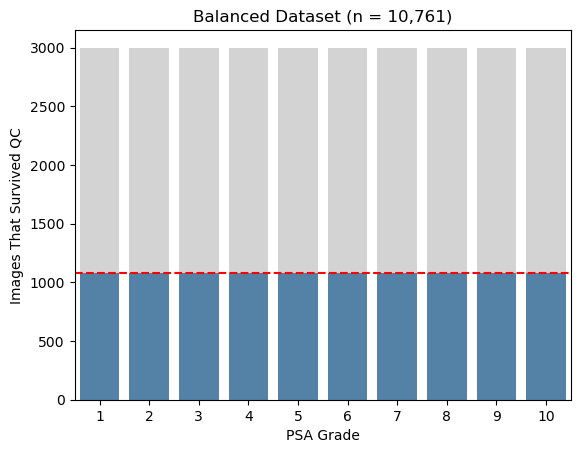

In [5]:
##  SAMPLING THE DATASET TO STANDARDIZE THE OUTCOME SIZES  ##

# Group the metadata_df by grade and sample 391 rows from each grade
metadata_df_subset = metadata_df.groupby('grade').sample(n=min_card_freq, random_state=42)

# Reset the index of the new DataFrame
metadata_df_subset = metadata_df_subset.reset_index(drop=True)

# Plot the background bar
sns.barplot(x='grade', y='count', data=background_data, color='lightgray')

# viz the card distribution, with the min grade cutoff
sns.countplot(x='grade', data=metadata_df_subset,color='steelblue', order=sorted(metadata_df_subset['grade'].unique(), reverse=False))

# Set the plot title and axis labels
plt.title('Balanced Dataset (n = 10,761)'.format(min_card_freq))
plt.xlabel('PSA Grade')
plt.ylabel('Images That Survived QC')

# Add a horizontal line at the specific value
plt.axhline(y=min_card_freq, color='red', linestyle='--')

# Display the plot
plt.show()


In [6]:
### RUN ONLY ONCE ###
##  MOVING SUBSET OF FILES TO NEW DIR  ##


# # Iterate over the file paths in metadata_df_subset
# for file_path in metadata_df_subset['file_path']:
#     try:
#         # Extract the file name from the file path
#         file_name = os.path.basename(file_path)

#         # Construct the destination file path
#         destination_file_path = os.path.join(destination_directory, file_name)

#         # Copy the file to the destination directory
#         shutil.copy2(file_path, destination_file_path)
    
#     except FileNotFoundError:
#         print(f"File not found at location: {file_path}")

#     except shutil.Error as e:
#         print(f"Error moving file: {file_path}\n{str(e)}")
